<a href="https://colab.research.google.com/github/anibahs/PSA-INFO6205/blob/main/INFO_6205_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The World Cup is changing its playoff format using the Gale-Shapley matching algorithm. The eight best teams from groups A,B & C, called Super Group 1, will be matched against the eight best teams from groups D, E & F, called Super Group 2,  using the Gale-Shapley matching algorithm. Further social media will be used to ask fans, media, players and coaches to create a ranking of which teams they would most like to see play their favorite team.

Find a Gale-Shapley implementation in python on Github and modify it so that the eight Super Group 1 teams will be matched against the eight Super Group 2 teams. You can make up the preference lists for each team. Make sure you cite any code you use or state that you wrote it from scratch if you did. 

https://github.com/paulgb/Python-Gale-Shapley/blob/master/stable.py


The above reference code applies -

In [ ]:
import time
import random

In [ ]:
def stable(rankings, A, B):

  teams = dict((a, (rankings[(a, 1)], 1)) for a in A)
  is_stable = False # whether the current pairing (given by `partners`) is stable
  while is_stable == False:
      is_stable = True
      for b in B:
          is_paired = False # whether b has a pair which b ranks <= to n
          for n in range(1, len(B) + 1):
              a = rankings[(b, n)]
              a_partner, a_n = teams[a]
              if a_partner == b:
                  if is_paired:
                      is_stable = False
                      teams[a] = (rankings[(a, a_n + 1)], a_n + 1)
                  else:
                      is_paired = True

  return sorted((a, b) for (a, (b, n)) in teams.items())

In [ ]:
#initialize preferences 
#rankings[(a, n)] = partner that a ranked n^th

def initializeTeams(n):
  #Super group A
  A = [str(x) for x in range(1,n+1)]
  print("Team A:", A)
  yield A
  #Super group B
  B = list(map(chr, range(97, 97+n)))
  print("Team B:", B)
  yield B
  rank = dict()

  for e in A:
    pref = [x for x in range(1,n+1)]
    random.shuffle(pref)
    rank[e] = tuple(pref)

  for e in B:
    pref = [x for x in range(1,n+1)]
    random.shuffle(pref)
    rank[e] = tuple(pref)

  print("Rank :", rank)
  yield rank

In [ ]:
#create set of preferences/rankings
def createPreferences(A,B, rank):
  Arankings = dict(((a, rank[a][b_]), B[b_]) for (a, b_) in product(A, range(0, len(A))))
  Brankings = dict(((b, rank[b][a_]), A[a_]) for (b, a_) in product(B, range(0, len(B))))

  rankings = Arankings
  rankings.update(Brankings)

  return rankings

In [ ]:
from itertools import product

data = initializeTeams(6)
A,B,rank=next(data),next(data),next(data)

rankings=createPreferences(A,B, rank)
print("Stable Matching :", stable(rankings, A, B))


Team A: ['1', '2', '3', '4', '5', '6']
Team B: ['a', 'b', 'c', 'd', 'e', 'f']
Rank : {'1': (4, 6, 2, 3, 1, 5), '2': (6, 1, 2, 3, 5, 4), '3': (3, 4, 1, 6, 2, 5), '4': (2, 4, 3, 6, 5, 1), '5': (6, 2, 5, 1, 3, 4), '6': (4, 6, 3, 5, 1, 2), 'a': (6, 4, 1, 3, 5, 2), 'b': (4, 3, 6, 5, 2, 1), 'c': (1, 6, 5, 3, 4, 2), 'd': (6, 2, 4, 5, 1, 3), 'e': (3, 6, 1, 2, 5, 4), 'f': (6, 5, 4, 2, 3, 1)}
Stable Matching : [('1', 'e'), ('2', 'b'), ('3', 'c'), ('4', 'a'), ('5', 'd'), ('6', 'f')]


Use a loop to shuffle the preference lists for each team 1000 times.  Calculate the percentage of stable playoff matches.  See the function random.shuffle(x[, random])   https://docs.python.org/2/library/random.html 
 


In [ ]:
# count for number of stable matches 
stable_matches = 0
newRank = [] 

for r in rank.items():
  newRank.append(list([r[0], list(r[1])]))

# loop 1000 times
for i in range(1000):
  # shuffle the preference lists for each team
  for team in newRank:
    random.shuffle(team[1])      
  newRankTuple = dict([tuple([r[0], tuple(r[1])]) for r in newRank])
  rankings=createPreferences(A,B, newRankTuple)

  # call stable match
  if stable(rankings, A, B):
    stable_matches += 1

# calculate the percentage of stable matches
percentage = stable_matches / 1000 * 100
print("Percentage of stable matches: {:.2f}%".format(percentage))

Percentage of stable matches: 100.00%


Randomly assume certain teams win and lose each round and eliminate the losers from the preference lists for each team. Can the Gale-Shapley matching algorithm be applied over and over in each round (16 teams, 8 teams, 4 teams, 2 teams) to create stable matches? You can answer this with code or rhetoric. 



**Answer** - Assuming teams from either group can lose, we cannot predict the number of loser teams from each super group. This would mean, the size of both sets is not gauranteed to be equal in each round. We need both sets to be of equal size as the we will be check preferences for both teams. This is a preliminary requirement to achieve stable matching.

Therefore, since both teams do not remain of equal size in both cases, Gale Shapley cannot be applied over and over to achieve stable matching.


Now combine the lists so that any team can be matched against any other irrespective of conference.  Can the Gale-Shapley matching algorithm still create stable matches? (With just one list matching against itself?) You can answer this with code or rhetoric. 
 

**Answer** - Combining the lists would create one list, where each team would be up against the all the teams form both super groups except itself. We will now need to check each team against the entire set of teams, also the rankings are over the complete set. In this case we need to use the stable roommate problem or the Irvings Algorithm, which can find stable matches but does not gaurantee it.

Double the size of the lists in problem A several times (you can make up team names like team1, team2, etc.) and measure the amount of time it takes to create stable matches.  How fast does the execution time grow in relation to the size of the lists? 

In [ ]:
# size of each team at 6
data = initializeTeams(6)
A,B,rank=next(data),next(data),next(data)

rankings=createPreferences(A,B, rank)
start = time.time()
stable(rankings, A, B)
end = time.time()
print("Processing Time in milliseconds: ", (end - start)*1000)

Team A: ['1', '2', '3', '4', '5', '6']
Team B: ['a', 'b', 'c', 'd', 'e', 'f']
Rank : {'1': (3, 2, 5, 4, 1, 6), '2': (2, 3, 5, 4, 6, 1), '3': (3, 1, 4, 5, 6, 2), '4': (6, 5, 4, 1, 2, 3), '5': (5, 2, 3, 1, 6, 4), '6': (2, 4, 1, 3, 6, 5), 'a': (6, 4, 1, 5, 2, 3), 'b': (4, 3, 6, 5, 2, 1), 'c': (6, 4, 3, 5, 1, 2), 'd': (6, 3, 4, 2, 1, 5), 'e': (5, 3, 2, 4, 1, 6), 'f': (6, 2, 4, 3, 1, 5)}
Processing Time in milliseconds:  0.1544952392578125


In [ ]:
# double team size 10 times and measure processing time  
n=5
init_size = 12

time_comparison = {}
for ind in range(n):
  team_size = init_size
  init_size = init_size*2
  data = initializeTeams(team_size)
  A,B,rank=next(data),next(data),next(data)

  rankings=createPreferences(A,B, rank)
  start = time.time()
  stable(rankings, A, B)
  end = time.time()
  time_comparison[team_size] = (end - start)*1000

Team A: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
Team B: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
Rank : {'1': (4, 9, 1, 5, 8, 7, 10, 6, 12, 11, 2, 3), '2': (1, 11, 10, 9, 4, 3, 8, 6, 5, 2, 7, 12), '3': (3, 4, 9, 2, 6, 10, 5, 1, 12, 8, 11, 7), '4': (6, 2, 1, 12, 3, 5, 10, 7, 9, 4, 8, 11), '5': (5, 11, 7, 4, 3, 8, 2, 10, 9, 12, 1, 6), '6': (5, 12, 4, 1, 6, 10, 3, 7, 11, 8, 9, 2), '7': (5, 3, 4, 9, 6, 12, 1, 8, 11, 10, 2, 7), '8': (6, 1, 2, 8, 5, 3, 4, 10, 7, 12, 11, 9), '9': (1, 8, 11, 3, 2, 4, 5, 6, 10, 7, 9, 12), '10': (3, 5, 9, 11, 4, 7, 2, 1, 12, 8, 6, 10), '11': (2, 11, 1, 6, 5, 4, 9, 10, 7, 8, 12, 3), '12': (4, 12, 2, 3, 10, 11, 7, 6, 1, 9, 8, 5), 'a': (12, 3, 4, 10, 11, 7, 1, 9, 2, 8, 5, 6), 'b': (4, 9, 12, 3, 1, 5, 10, 7, 8, 2, 6, 11), 'c': (2, 5, 10, 4, 1, 9, 3, 8, 11, 12, 6, 7), 'd': (9, 5, 6, 4, 7, 10, 3, 11, 2, 1, 12, 8), 'e': (2, 4, 6, 12, 3, 11, 1, 7, 10, 8, 9, 5), 'f': (5, 6, 2, 10, 7, 9, 11, 12, 8, 3, 1, 4), 'g': (4, 9, 3, 10, 5

In [ ]:
print([ [k[0],round(k[1], 4)] for k in time_comparison.items()])

[[12, 0.1097], [24, 1.8532], [48, 25.3029], [96, 108.3229], [192, 967.7794]]


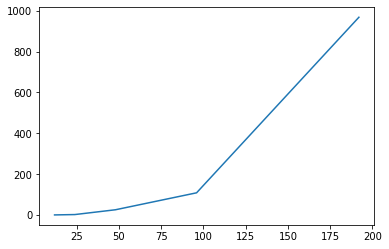

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(time_comparison.keys()), list(time_comparison.values()), label="Processing time ")